In [1]:
# As we use our own external modules, we need the folder src to be in the PYTHONPATH env variable.
# However we do not expect the reader to add that folder to the env variable,
# therefore we manually load it temporarily in each notebook.
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from modules.config import PATH_RESULTS_SUMMARY, PATH_RESULTS_VAR_TUPLE, PATH_RESULTS_VAR_REGION, N_REDUCED_SCNEARIOS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_pickle(PATH_RESULTS_SUMMARY)

In [4]:
results['fleet_size'] = results['kick_scooter'] + results['bicycle'] + results['car']

In [5]:
results

,status,objective,n_trips_avg,n_unfilled_demand_avg,demand_avg,n_parking_avg,n_relocations_avg,kick_scooter,bicycle,car,relocations_disabled,non_anticipativity_disabled,fleet_size
0,Optimal,41986.890749,7810.0,1787.5,9597.5,26190.0,3491.0,10000,4000,3000,False,False,17000
1,Optimal,42184.083245,7899.0,1698.5,9597.5,26101.0,3160.5,10000,4000,3000,False,True,17000
2,Optimal,32621.697044,5212.0,4385.5,9597.5,28788.0,0.0,10000,4000,3000,True,False,17000
3,Optimal,32664.578664,5215.0,4382.5,9597.5,28785.0,0.0,10000,4000,3000,True,True,17000
4,Optimal,39492.227015,7406.0,2191.5,9597.5,18594.0,3703.0,8000,3000,2000,False,False,13000
5,Optimal,39660.304884,7460.5,2137.0,9597.5,18539.5,3283.0,8000,3000,2000,False,True,13000
6,Optimal,29844.082407,4446.5,5151.0,9597.5,21553.5,0.0,8000,3000,2000,True,False,13000
7,Optimal,29861.529239,4443.5,5154.0,9597.5,21556.5,0.0,8000,3000,2000,True,True,13000
8,Optimal,35886.382460,6810.5,2787.0,9597.5,11189.5,3907.0,6000,2000,1000,False,False,9000
9,Optimal,36129.948334,6821.0,2776.5,9597.5,11179.0,3517.5,6000,2000,1000,False,True,9000


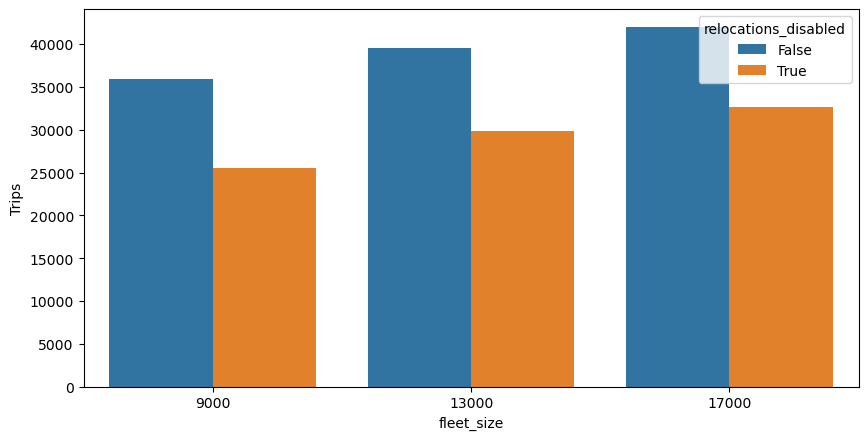

In [6]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(
    data=results[results["non_anticipativity_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="relocations_disabled",
)
ax.set(ylabel="Trips")
plt.show()


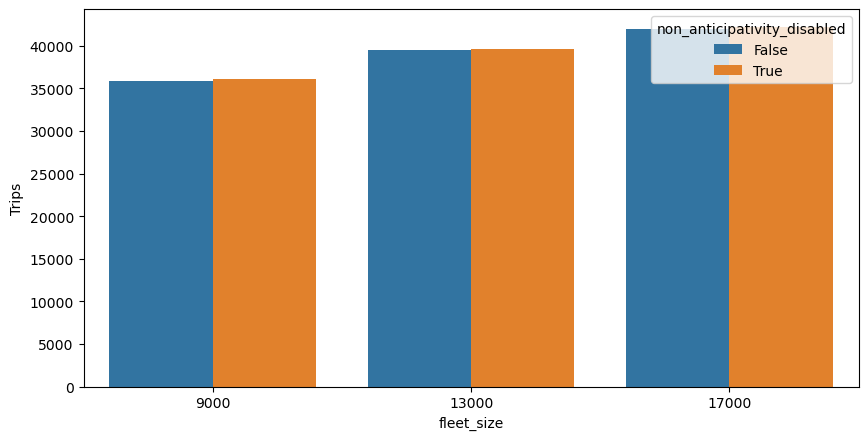

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(
    data=results[results["relocations_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="non_anticipativity_disabled",
)
ax.set(ylabel="Trips")
plt.show()


In [8]:
vars_by_region = pd.read_pickle(PATH_RESULTS_VAR_REGION)
vars_by_hex_tuple = pd.read_pickle(PATH_RESULTS_VAR_TUPLE)

In [9]:
vars_reset = vars_by_hex_tuple.reset_index()
relocations = vars_reset[vars_reset['start_hex_ids'] != vars_reset['end_hex_ids']]
# relocations.groupby('time')
relocations = relocations.rename(columns={'relocations/parking': 'relocations'})
print(relocations.groupby('time')['relocations'].sum() / N_REDUCED_SCNEARIOS, '\n')
print(relocations.groupby('vehicle_types')['relocations'].sum() / N_REDUCED_SCNEARIOS)

time
0     3688.0
12       0.0
Name: relocations, dtype: float64 

vehicle_types
bicycle          687.0
car              252.0
kick_scooter    2749.0
Name: relocations, dtype: float64
